In [1]:
import sys
import os
__src_dir__ = os.path.abspath('../src')
assert os.path.exists(__src_dir__), "'src' dir not found: " + __src_dir__
if __src_dir__ not in sys.path:
    sys.path.append(__src_dir__)

# Estimate Homography Using DLT
![alt text](../images/ch_4_1_dlt.png "Logo Title Text 1")

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def draw_pts(ax, pts, marker='rx-', **kwargs):
    loop = [0, 1, 2, 3, 0]
    ax.plot(pts[loop, 0], pts[loop, 1], marker, **kwargs)
    
def plot_results(H, src_img, src_pts, dst_img, dst_pts):
    ## Show source and Target
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.set_title("Source Image")
    ax1.imshow(src_img)
    draw_pts(ax1, src_pts)
    ax2.set_title("Target Image")
    ax2.imshow(dst_img)
    draw_pts(ax2, dst_pts)

    # Show source warpped to target
    src_wrp_pts = np.matmul(H, cv2.convertPointsToHomogeneous(src_pts).reshape(len(src_pts), 3).transpose()).transpose()
    src_wrp_img = cv2.warpPerspective(src_img, H, tuple(reversed(dst_img.shape[:2])))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
    ax1.set_title("Source Image")
    ax1.imshow(src_img)
    draw_pts(ax1, src_pts)
    ax2.set_title("Warpped to Target Image")
    ax2.imshow(src_wrp_img)
    draw_pts(ax2, np.array([[x/z, y/z] for x, y, z in src_wrp_pts]))
    ax3.set_title("Actual Target Image")
    ax3.imshow(dst_img)
    draw_pts(ax3, dst_pts)

    # Show target warped to Source
    H_inv = np.linalg.inv(H)
    dst_wrp_pts = np.matmul(H_inv, cv2.convertPointsToHomogeneous(dst_pts).reshape(len(dst_pts), 3).transpose()).transpose()
    dst_wrp_img = cv2.warpPerspective(dst_img, H_inv, tuple(reversed(src_img.shape[:2])))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
    ax1.set_title("Target Image")
    ax1.imshow(dst_img)
    draw_pts(ax1, dst_pts)
    ax2.set_title("Warpped to Source Image")
    ax2.imshow(dst_wrp_img)
    draw_pts(ax2, np.array([[x/z, y/z] for x, y, z in dst_wrp_pts]))
    ax3.set_title("Actual Source Image")
    ax3.imshow(src_img)
    draw_pts(ax3, src_pts)

In [7]:
img_frontal_path = "../images/test_images/book_frontal.jpg"
img_frontal = plt.imread(img_frontal_path)
pts_frontal = np.array([
    [916.274219569, 692.530249254],
    [76.7001290635, 690.521698798],
    [61.6360006453, 52.8069290957],
    [917.278494797, 39.7513511333],    
])

img_persp_path = "../images/test_images/book_perspective.jpg"
img_persp = plt.imread(img_persp_path)
pts_persp = np.array([
    [191.187505042, 463.555497298],
    [485.44014681, 82.9351859321],
    [853.004880213, 221.525167379],
    [695.333669436, 706.590102444],    
])


src_img, src_pts = img_frontal, pts_frontal
dst_img, dst_pts = img_persp, pts_persp

### Compute Homography

In [19]:
cv_H, mask = cv2.findHomography(src_pts, dst_pts)
H = cv_H

## Show Source and Target Images

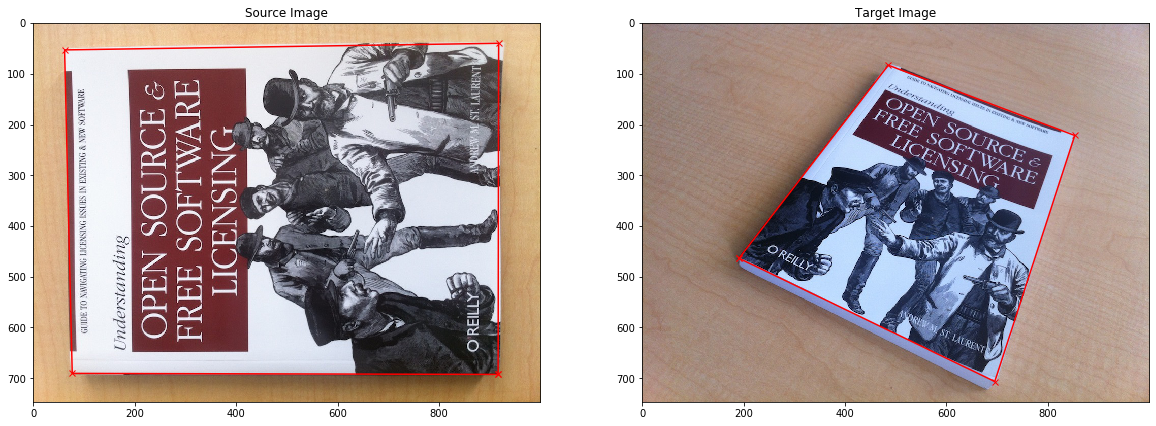

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title("Source Image")
ax1.imshow(src_img)
draw_pts(ax1, src_pts)
ax2.set_title("Target Image")
ax2.imshow(dst_img)
draw_pts(ax2, dst_pts)

### Warp Source into Target

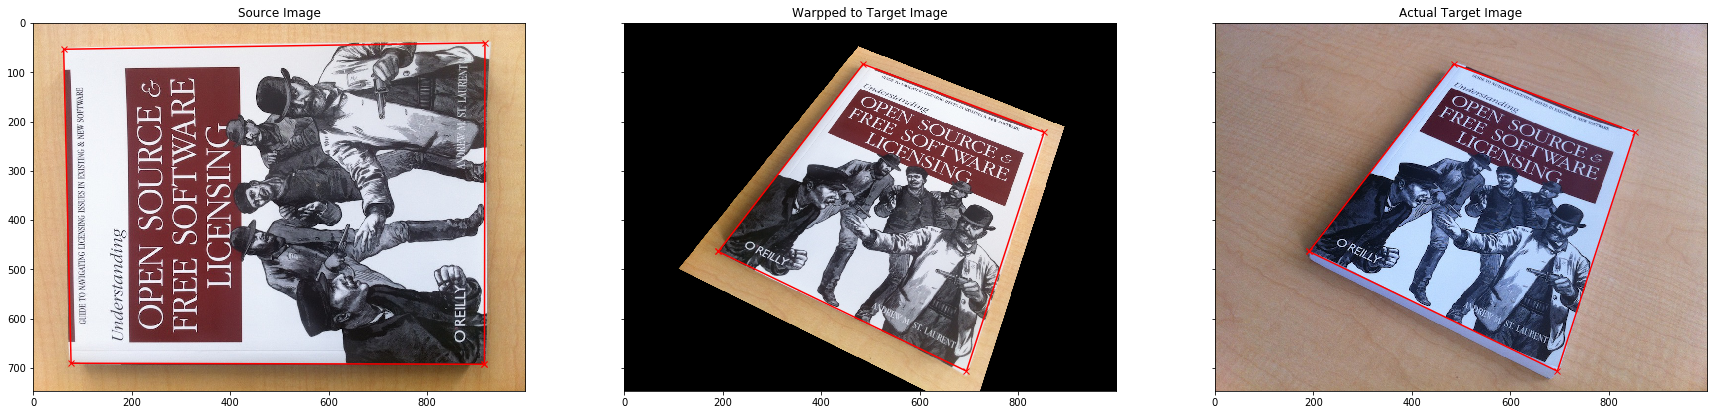

In [10]:
src_wrp_pts = np.matmul(H, cv2.convertPointsToHomogeneous(src_pts).reshape(len(src_pts), 3).transpose()).transpose()
src_wrp_img = cv2.warpPerspective(src_img, H, tuple(reversed(dst_img.shape[:2])))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
ax1.set_title("Source Image")
ax1.imshow(src_img)
draw_pts(ax1, src_pts)
ax2.set_title("Warpped to Target Image")
ax2.imshow(src_wrp_img)
draw_pts(ax2, np.array([[x/z, y/z] for x, y, z in src_wrp_pts]))
ax3.set_title("Actual Target Image")
ax3.imshow(dst_img)
draw_pts(ax3, dst_pts)

### Warp Target into Source

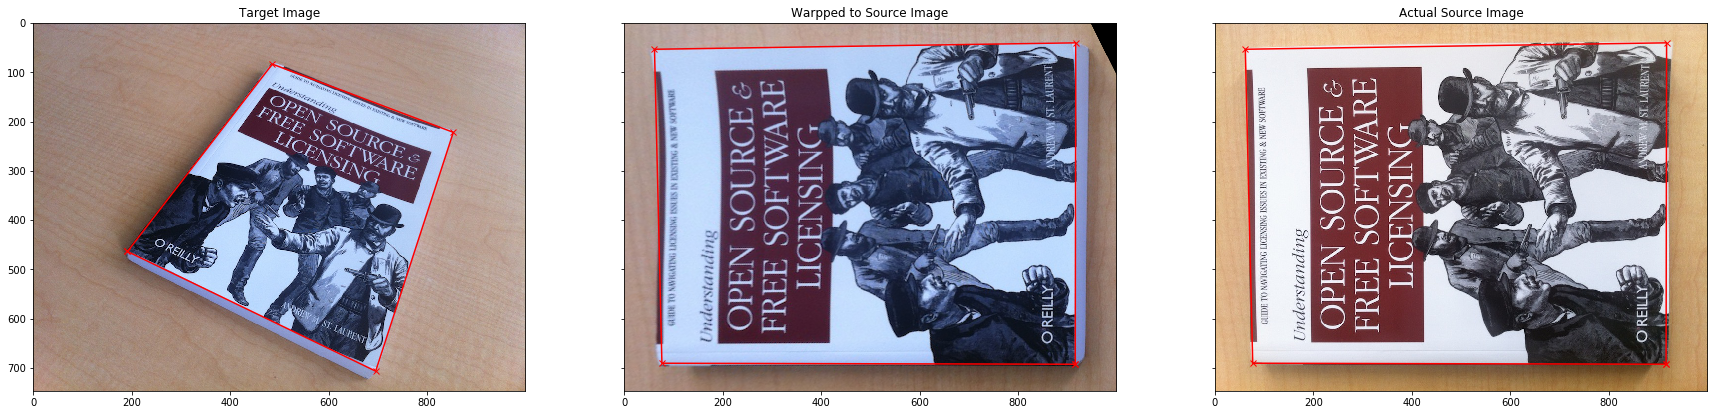

In [11]:
H_inv = np.linalg.inv(H)
dst_wrp_pts = np.matmul(H_inv, cv2.convertPointsToHomogeneous(dst_pts).reshape(len(dst_pts), 3).transpose()).transpose()
dst_wrp_img = cv2.warpPerspective(dst_img, H_inv, tuple(reversed(src_img.shape[:2])))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
ax1.set_title("Target Image")
ax1.imshow(dst_img)
draw_pts(ax1, dst_pts)
ax2.set_title("Warpped to Source Image")
ax2.imshow(dst_wrp_img)
draw_pts(ax2, np.array([[x/z, y/z] for x, y, z in dst_wrp_pts]))
ax3.set_title("Actual Source Image")
ax3.imshow(src_img)
draw_pts(ax3, src_pts)


In [46]:
def mult_img_pts(H, pts):
    if pts.shape[1] == 2:
        pts = cv2.convertPointsToHomogeneous(pts).reshape(len(pts), 3)
    w_pts = np.matmul(H, pts.transpose()).transpose()
    return np.array([[x/z, y/z, 1] for x, y, z in w_pts])

In [66]:
np.set_printoptions(suppress=True)
h = np.round(H, 6)
h

array([[ -0.427245,  -0.516691, 892.792453],
       [  0.312508,  -0.214305, 209.988275],
       [ -0.000341,   0.000091,   1.      ]])

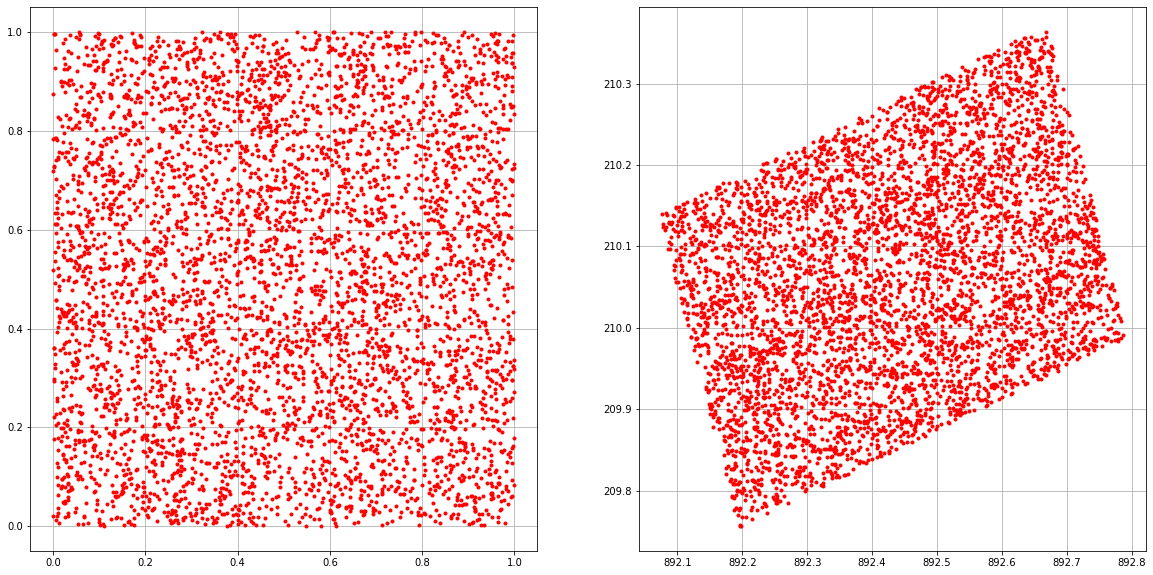

In [65]:
pts = np.random.random((5000, 3))
pts[:, -1] = 1

w_pts = mult_img_pts(H, pts)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(pts[:, 0], pts[:, 1], 'r.')
ax2.plot(w_pts[:, 0], w_pts[:, 1], 'r.')
ax1.grid(True)
ax2.grid(True)


array([[570.43160552, 421.63980512,   1.56129239],
       [879.5740671 , 638.89258168,   1.73127897],
       [852.69920014, 558.78407098,   1.7360888 ],
       [636.40460276, 607.41339001,   1.2638049 ],
       [820.08456256, 869.34842462,   1.57464307],
       [975.05065458, 479.01024603,   1.34673289],
       [583.12186533, 891.19978184,   1.17482679],
       [625.89917025, 798.46938419,   1.42687172],
       [482.47995231, 823.89839466,   1.41959732],
       [864.15607   , 402.12273916,   1.91291747],
       [427.44959522, 871.179614  ,   1.79563053],
       [963.04228575, 494.08071646,   1.41687219],
       [414.30748778, 468.06468132,   1.42691608],
       [864.85909185, 697.1544588 ,   1.10325409],
       [574.91260655, 645.54474783,   1.41110077],
       [554.59189055, 593.0224243 ,   1.01843177],
       [973.81974932, 617.72737666,   1.50717699],
       [882.5211891 , 646.76532905,   1.93157739],
       [827.80109437, 652.28151449,   1.63834947],
       [720.37357508, 508.58894